<font size="8">Pytorch 多层感知机分类MNIST数据集</font>

<font siz="3">用Pytroch搭建两层多层感知机MLP神经网络，对MNIST瘦削数字数据集进行图像分类</font>

In [3]:
# 这两行代码是为了忽视警告的
# import warnings
# warnings.filterwarnings("ignore")
import torch
import numpy as np

import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False



In [12]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# 载入数据时使用的处理器个数
num_workers = 0

# 每一批的数据个数
batch_size = 20

# 验证集所占比例
valid_size = 0.2

# 将数据转换为Pytorch的张量Tensor 类型,pytorch 处理数据都是以张量为单位进行处理的
# 这里的transforms其实是一个对象，这个对象是一个函数，这个函数后面是作为参数传入到datasets.MNIST()
# 这个函数中的。这个其实有点像java中的内部类，在学hashmap的时候，我们自己写的比较器很像
transforms = transforms.ToTensor()

# 选择训练集和测试集，root: 数据集文件根目录
# train：是否载入训练集
# download：如果目录找不到数据集，是否自动下载
# transform：将载入的数据按上面transform定义的方式进行转换
train_data = datasets.MNIST(root = 'data',train=True,download=True,transform=transforms)
test_data = datasets.MNIST(root='data',train=False,download=True,transform=transforms)


# print("训练集中共有{}个样本".format(len(train_data)))
# print("测试机中共有{}个样本".format(len(test_data)))

# 将训练集每张图像对应的索引随机打乱，将索引分为训练集索引和验证机索引
# 虽然我个人认为，没有打乱顺序的必要。
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

# 这里切片是在训练集中切片的，所以是验证集和训练集。这个验证集的作用就是有点像是自动调参的感觉了
split = int(np.floor(valid_size*num_train))
train_idx,valid_idx = indices[split:],indices[:split]


# 这里是初始化验证集和训练集的采样器，注意了，验证集和训练集的采样器的内容其实是隔离的
# 要知道采样器的作用，在那之前得了解模型是怎么训练的。模型的训练不是直接就是把训练集放进去就好的
# 不然训练集大一点，直接就把内存撑爆掉(当然，内存小是一部分原因)所以，我们传入训练集的时候其实
# 不是直接传一整个的训练集的，而是将一整个训练集分成好几个小份，然后每一小份单独训练。
# 这样的处理其实很好。因为这样的话，每一小份就能够单独开一个线程，多线程来处理了，还变快了
# 不仅如此，这样生成的模型也会有好几个小份，而好几份模型的性能又是不一样的，那么评估，这些模型之后
# 我们就可以得到一个优化模型的方案，然后挑战参数，搓一个新的模型(这里应该是有专门的方案的)
# 训练完一整训练集的过程 叫完成一个 epoch。不同的超参数(就是小数据，但是我觉得这么叫挺装的)可以训练出不同的模型
# 所以可以通过打乱整个训练集，然后再重新划分超参数的方式重复地利用这些数据，得到一个最好的模型
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# 创建训练集，验证集，测试集的数据loader,python中的生成器，每一次调用返回一个batch 的数据
# 这个对象不是数据集，是DataLoader，是作为一个参数传入的，有点像一个迭代器
train_loader = torch.utils.data.DataLoader(train_data,batch_size = batch_size,
                                           sampler=train_sampler,num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
                                           sampler = valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

12000


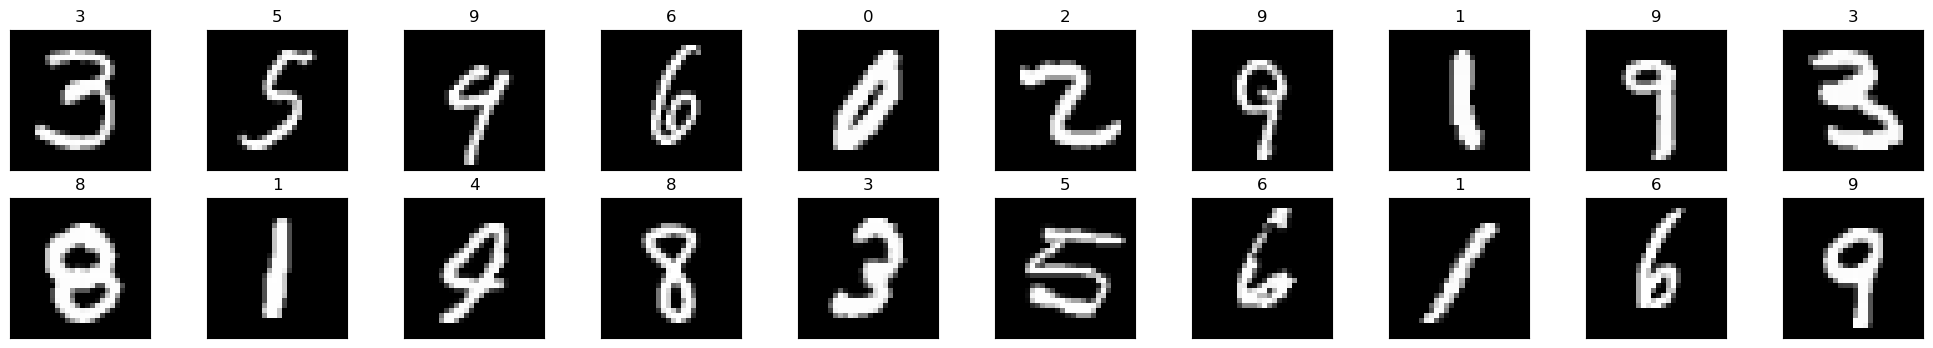

In [15]:
# 可重复运行，展示不同的图片

# 构造迭代器，获得训练集中的一批次数据
dataiter = iter(train_loader)
images,labels = next(dataiter)
# 将数据集中的Tensor 张量转化为numpy的array数据类型
images = images.numpy()

# 可视化图片和标签
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    # 生成两行10列的子图，这是第idx+1个子图
    ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
    # 表示显示的是图像，图像是灰度图
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    # .item()获取张量的数值
    ax.set_title(str(labels[idx].item()))

<font size=5>展示图像的像素细节</font>

In [24]:
images[3].shape

(1, 28, 28)

In [21]:
np.squeeze(images[1]).shape

(28, 28)

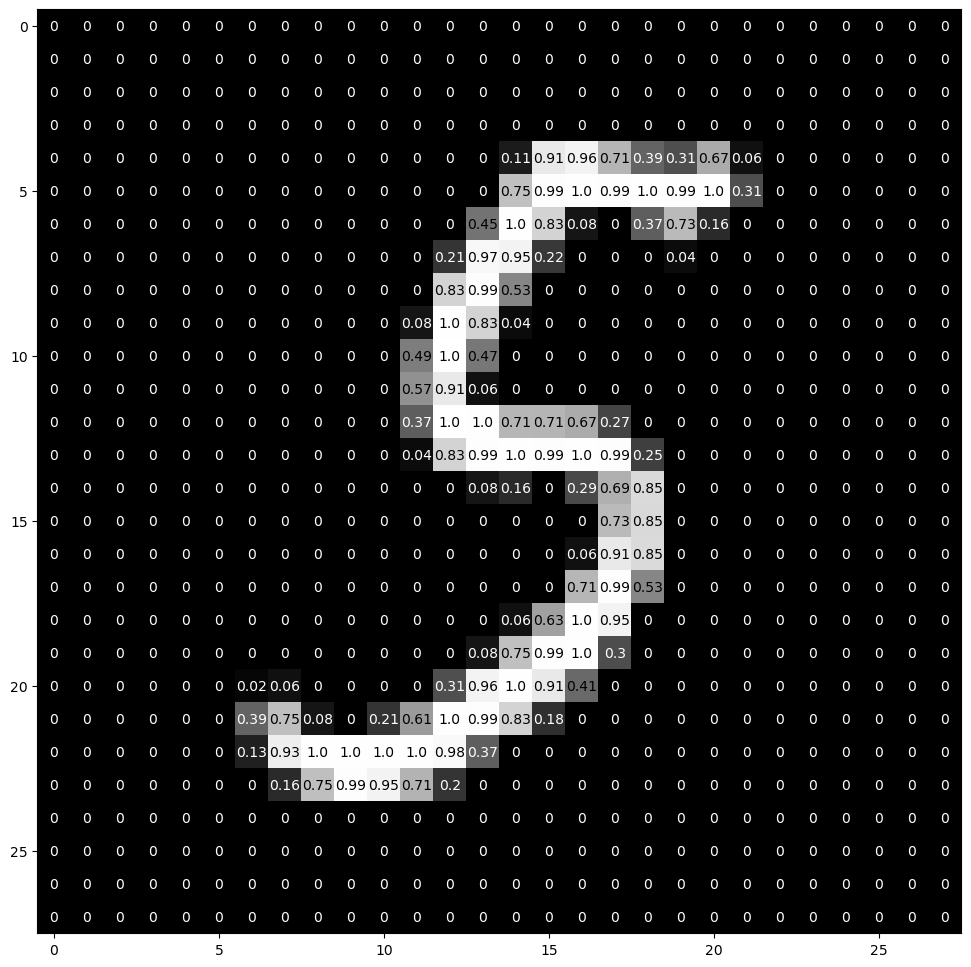

In [23]:
# 去掉图像的批次维度，只保留索引为1 的单张图像的长宽像素值
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111) # 表示只画一张图，当然，也可以用Axes 实例化生成，但是那样要写更多的代码
ax.imshow(img,cmap = 'gray')
width,height = img.shape
thresh = img.max()/2.5

# 遍历每一行每一列的每一个像素
for x in range(width):
    for y in range(height):
        # 像素值保留两位小数，如果为0则显示0
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val),xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')



<font size=5>定义神经网络结构</font>

In [1]:
import torch.nn as nn
import torch.nn.functional as F

# 这里的nn 是一个python module，这个module 
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # 定义第一个隐含层和第二个隐含层的神经元个数
        hidden_1 = 512
        hidden_2 = 512

        # 输入层到隐含层，输入维度为 784,输出维度为 hidden_1
        self.fc1 = nn.Linear(28*28,hidden_1)
        # 第一层隐含层到第二层隐含层，输入维度为 hidden_1, 输出维度为 hidden_2
        self.fc2 = nn.Linear(hidden_1,hidden_2)
        # 第二层隐藏层到输出层，输入维度为 hidden_2,输出维度为10
        self.fc3 = nn.Linear(hidden_2,10)
        # 定义 Dropout 率为 0.2 防止过拟合
        self.dropout = nn.Dropout(0.2)
    def forward(self,x):
        # 将原始图片拉平成 784 维的长向量
        x = x.view(-1,28*28)
        # 经过第一层隐藏层，激活函数为relu
        x = F.relu(self.fc1(x))
        # Dropout 层
        x = self.dropout(x)
        # 经过第二层隐藏层，激活函数为relu
        x = F.relu(self.fc2(x))
        # Droupout 层
        x = self.dropout(x)
        # 输出层
        x = self.fc3(x)
        return x

# 实例化模型，打印模型信息
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
print